In [1]:
from google.colab import drive
drive.mount('/content/gdrive/',force_remount=True)
#%cd /content/drive/My-Drive/
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import math

Mounted at /content/gdrive/


In [2]:
raw = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/test8.csv')
raw

,Date,TSLA,4958.TW,2330.TW,1536.TW,3501.TW,603305.SS,300750.SZ,600885.SS,DAN,TEL
0,2018-06-11,66.419998,62.356850,201.366592,139.268356,43.161572,35.760654,36.075409,29.904634,21.776939,91.941254
1,2018-06-12,68.554001,61.476101,204.039581,136.954926,42.667358,35.661705,39.682949,30.325052,21.423853,92.215569
2,2018-06-13,68.956001,62.444927,206.712601,138.805664,42.914463,35.008633,43.649250,29.952877,20.832191,91.884514
3,2018-06-14,71.543999,61.476101,201.812103,140.656418,42.667358,34.068604,48.014175,29.692720,20.994423,93.937096
4,2018-06-15,71.634003,61.476101,205.821594,142.969833,42.832092,33.504589,52.817585,29.118149,20.813103,93.643867
...,...,...,...,...,...,...,...,...,...,...,...
746,2021-04-26,738.200012,104.000000,610.000000,104.000000,54.200001,30.920000,349.000000,53.840000,27.290001,135.169998
747,2021-04-27,704.739990,106.000000,610.000000,103.500000,54.400002,31.129999,348.600006,54.119999,27.670000,135.149994
748,2021-04-28,694.400024,104.500000,602.000000,102.500000,54.799999,32.680000,367.029999,55.400002,27.709999,135.919998
749,2021-04-29,677.000000,106.000000,600.000000,103.500000,54.599998,31.950001,379.989990,56.290001,26.459999,138.179993


In [8]:
td = raw.iloc[600:,:].reset_index(drop=True) ###調成和底下天數一樣
tdd = td.copy()
tdd = tdd.iloc[:,1:]
td['Date'] = pd.to_datetime(td.Date, format = '%Y/%m/%d')
td

,Date,TSLA,4958.TW,2330.TW,1536.TW,3501.TW,603305.SS,300750.SZ,600885.SS,DAN,TEL
0,2020-09-30,429.010010,126.0,429.128448,93.309685,45.599998,36.500000,209.130005,45.396782,12.269569,96.954582
1,2020-10-01,448.160004,126.0,429.128448,93.309685,45.599998,36.500000,209.130005,45.396782,13.185803,97.758072
2,2020-10-02,415.089996,126.0,429.128448,93.309685,45.599998,36.500000,209.130005,45.396782,13.434780,97.569595
3,2020-10-05,425.679993,127.0,428.632904,94.492065,45.700001,36.500000,209.130005,45.396782,14.062201,100.555412
4,2020-10-06,413.980011,132.5,435.570343,95.674454,45.900002,36.500000,209.130005,45.396782,13.723594,101.011711
...,...,...,...,...,...,...,...,...,...,...,...
146,2021-04-26,738.200012,104.0,610.000000,104.000000,54.200001,30.920000,349.000000,53.840000,27.290001,135.169998
147,2021-04-27,704.739990,106.0,610.000000,103.500000,54.400002,31.129999,348.600006,54.119999,27.670000,135.149994
148,2021-04-28,694.400024,104.5,602.000000,102.500000,54.799999,32.680000,367.029999,55.400002,27.709999,135.919998
149,2021-04-29,677.000000,106.0,600.000000,103.500000,54.599998,31.950001,379.989990,56.290001,26.459999,138.179993


In [6]:
rrr= pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/LSTM預測結果/traindays=450/result2021-05-13 09:56:34.csv')
rrr

,Unnamed: 0,TSLA,4958.TW,2330.TW,1536.TW,3501.TW,603305.SS,300750.SZ,600885.SS,DAN,TEL
0,0,143.90073,114.500600,299.04680,110.324960,44.629520,41.010070,179.64930,35.014217,13.586861,83.213554
1,1,148.53632,115.027930,304.44708,108.993330,44.631626,42.180760,179.63744,34.785534,13.328561,84.083080
2,2,149.17784,115.873990,307.21475,108.067610,44.704914,42.443020,179.62917,35.317493,12.435044,82.689926
3,3,146.60811,116.246970,302.91016,107.158200,44.733974,42.045330,179.63353,35.719500,11.678064,79.822420
4,4,141.15831,114.905270,293.55930,104.178270,44.229710,39.885360,179.63707,34.605730,10.742152,76.486920
...,...,...,...,...,...,...,...,...,...,...,...
295,295,430.99220,108.088630,553.32200,106.278960,55.354267,31.576307,316.86914,47.904410,24.250214,123.061790
296,296,431.00482,106.796590,559.19836,104.313530,54.911170,31.527372,321.21564,48.211370,24.686880,124.154260
297,297,432.17130,106.056170,567.99084,103.667580,55.127730,31.395144,320.39832,48.704260,24.425009,124.558340
298,298,426.52225,105.888954,570.30927,103.239174,55.505110,31.353370,320.12247,48.928253,24.621414,124.142000


In [7]:
#rdf.iloc[:,1]= td.pop('Date')
rdf = rrr.iloc[149:,:].reset_index(drop=True)
rdf.iloc[:,0]= td['Date']
rdf

,Unnamed: 0,TSLA,4958.TW,2330.TW,1536.TW,3501.TW,603305.SS,300750.SZ,600885.SS,DAN,TEL
0,2019-03-19,363.29843,122.943880,419.75424,88.506370,46.220783,35.911915,193.67451,42.860150,11.426391,95.459170
1,2019-03-20,366.68558,122.754616,423.15950,90.223940,46.342620,36.237568,192.37163,43.224842,11.682773,96.523990
2,2019-03-21,369.39362,122.347520,423.22806,92.151870,46.354458,36.444183,193.47874,43.632652,11.813426,97.204490
3,2019-03-22,375.68716,122.476860,424.50278,92.598190,46.394080,36.478313,197.50548,43.710610,12.492055,97.867805
4,2019-03-25,371.04367,122.762856,424.71133,92.873040,46.428180,36.477190,201.85284,43.724472,13.043366,98.079310
...,...,...,...,...,...,...,...,...,...,...,...
146,2019-10-09,430.99220,108.088630,553.32200,106.278960,55.354267,31.576307,316.86914,47.904410,24.250214,123.061790
147,2019-10-10,431.00482,106.796590,559.19836,104.313530,54.911170,31.527372,321.21564,48.211370,24.686880,124.154260
148,2019-10-11,432.17130,106.056170,567.99084,103.667580,55.127730,31.395144,320.39832,48.704260,24.425009,124.558340
149,2019-10-14,426.52225,105.888954,570.30927,103.239174,55.505110,31.353370,320.12247,48.928253,24.621414,124.142000


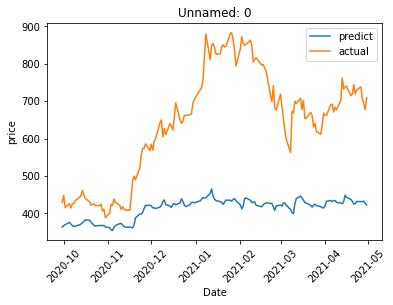

In [9]:
x= pd.to_datetime(td['Date'], format = '%Y/%m/%d')
y1= rdf['TSLA']
y2= td['TSLA']
plt.plot(x, y1, label= 'predict')
plt.plot(x, y2, label= 'actual')
plt.xlabel('Date')
plt.ylabel('price')
plt.xticks(rotation= 45)
plt.title(rdf.columns[0])
plt.legend(loc='best')
plt.show()

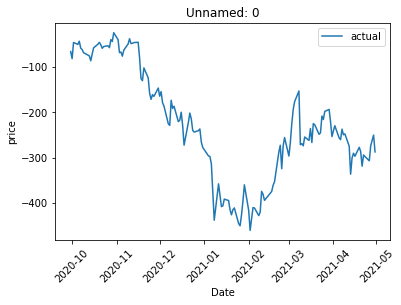

In [10]:
x= pd.to_datetime(td['Date'], format = '%Y/%m/%d')
y1= rdf['TSLA']
y2= td['TSLA']
#plt.plot(x, y1, label='predict')
#plt.plot(x, y2, label= 'actual')
plt.plot(x, y1-y2, label= 'actual')
plt.xlabel('Date')
plt.ylabel('price')
plt.xticks(rotation= 45)
plt.title(rdf.columns[0])
plt.legend(loc='best')
plt.show()

In [11]:
pre_df=rdf.iloc[:,1:] #刪掉時間行
pre_df

#rdf['Unnamed: 0'] = pd.to_datetime(rdf.Date, format = '%Y/%m/%d')
#rdf

,TSLA,4958.TW,2330.TW,1536.TW,3501.TW,603305.SS,300750.SZ,600885.SS,DAN,TEL
0,363.29843,122.943880,419.75424,88.506370,46.220783,35.911915,193.67451,42.860150,11.426391,95.459170
1,366.68558,122.754616,423.15950,90.223940,46.342620,36.237568,192.37163,43.224842,11.682773,96.523990
2,369.39362,122.347520,423.22806,92.151870,46.354458,36.444183,193.47874,43.632652,11.813426,97.204490
3,375.68716,122.476860,424.50278,92.598190,46.394080,36.478313,197.50548,43.710610,12.492055,97.867805
4,371.04367,122.762856,424.71133,92.873040,46.428180,36.477190,201.85284,43.724472,13.043366,98.079310
...,...,...,...,...,...,...,...,...,...,...
146,430.99220,108.088630,553.32200,106.278960,55.354267,31.576307,316.86914,47.904410,24.250214,123.061790
147,431.00482,106.796590,559.19836,104.313530,54.911170,31.527372,321.21564,48.211370,24.686880,124.154260
148,432.17130,106.056170,567.99084,103.667580,55.127730,31.395144,320.39832,48.704260,24.425009,124.558340
149,426.52225,105.888954,570.30927,103.239174,55.505110,31.353370,320.12247,48.928253,24.621414,124.142000


In [12]:
rdf_log= np.log(pre_df) #取log
rdf_diffk= rdf_log.diff(1).dropna().reset_index(drop=True) #取差分
rdf_diff_e= np.exp(rdf_diffk)-1 #報酬率
rdf_diff_e

,TSLA,4958.TW,2330.TW,1536.TW,3501.TW,603305.SS,300750.SZ,600885.SS,DAN,TEL
0,0.009323,-0.001539,0.008113,0.019406,0.002636,0.009068,-0.006727,0.008509,0.022438,0.011155
1,0.007385,-0.003316,0.000162,0.021368,0.000255,0.005702,0.005755,0.009435,0.011183,0.007050
2,0.017037,0.001057,0.003012,0.004843,0.000855,0.000937,0.020812,0.001787,0.057446,0.006824
3,-0.012360,0.002335,0.000491,0.002968,0.000735,-0.000031,0.022011,0.000317,0.044133,0.002161
4,-0.010600,0.001862,-0.000520,0.005339,0.001386,-0.000129,0.022447,0.001935,0.053800,0.017704
...,...,...,...,...,...,...,...,...,...,...
145,-0.001095,-0.010268,-0.006601,-0.018283,-0.002570,0.000887,0.009462,-0.001904,0.001534,0.003842
146,0.000029,-0.011954,0.010620,-0.018493,-0.008005,-0.001550,0.013717,0.006408,0.018007,0.008877
147,0.002706,-0.006933,0.015723,-0.006192,0.003944,-0.004194,-0.002544,0.010224,-0.010608,0.003255
148,-0.013071,-0.001577,0.004082,-0.004132,0.006846,-0.001331,-0.000861,0.004599,0.008041,-0.003343


In [13]:
stock_num=pre_df.shape[1]
inv_days=pre_df.shape[0]-1
print(stock_num,inv_days)

10 150


In [14]:
#將預測報酬率為負的改為0(因為後續要變成權重)
rdf_return_po=rdf_diff_e.copy()
for i in range(stock_num):
  for j in range(inv_days):
    if (rdf_return_po.iloc[j, i] < 0):
      rdf_return_po.iloc[j, i]=0
rdf_return_po

,TSLA,4958.TW,2330.TW,1536.TW,3501.TW,603305.SS,300750.SZ,600885.SS,DAN,TEL
0,0.009323,0.000000,0.008113,0.019406,0.002636,0.009068,0.000000,0.008509,0.022438,0.011155
1,0.007385,0.000000,0.000162,0.021368,0.000255,0.005702,0.005755,0.009435,0.011183,0.007050
2,0.017037,0.001057,0.003012,0.004843,0.000855,0.000937,0.020812,0.001787,0.057446,0.006824
3,0.000000,0.002335,0.000491,0.002968,0.000735,0.000000,0.022011,0.000317,0.044133,0.002161
4,0.000000,0.001862,0.000000,0.005339,0.001386,0.000000,0.022447,0.001935,0.053800,0.017704
...,...,...,...,...,...,...,...,...,...,...
145,0.000000,0.000000,0.000000,0.000000,0.000000,0.000887,0.009462,0.000000,0.001534,0.003842
146,0.000029,0.000000,0.010620,0.000000,0.000000,0.000000,0.013717,0.006408,0.018007,0.008877
147,0.002706,0.000000,0.015723,0.000000,0.003944,0.000000,0.000000,0.010224,0.000000,0.003255
148,0.000000,0.000000,0.004082,0.000000,0.006846,0.000000,0.000000,0.004599,0.008041,0.000000


In [15]:
rdf_return_po.sum(axis=1)

0      0.090647
1      0.068296
2      0.114610
3      0.075152
4      0.104471
         ...   
145    0.015725
146    0.057658
147    0.035852
148    0.023568
149    0.036821
Length: 150, dtype: float64

In [16]:
rdf_diff=rdf_diff_e.copy()
pro_rdf_diff= pd.DataFrame(columns= rdf_diff.columns, index=rdf_diff.index)
pro_rdf_diff

,TSLA,4958.TW,2330.TW,1536.TW,3501.TW,603305.SS,300750.SZ,600885.SS,DAN,TEL
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
for i in range(inv_days):
  for j in range(stock_num):
    np.seterr(invalid='ignore')
    pro_rdf_diff.iloc[i,j]= rdf_return_po.iloc[i,j] / rdf_return_po.sum(axis=1)[i]

pro_rdf_diff.fillna(value=0)
pro_rdf_diff #投資權重

,TSLA,4958.TW,2330.TW,1536.TW,3501.TW,603305.SS,300750.SZ,600885.SS,DAN,TEL
0,0.102853,0,0.0894952,0.214084,0.0290795,0.100037,0,0.0938679,0.247527,0.123056
1,0.108135,0,0.00237232,0.312879,0.00374028,0.0834852,0.0842667,0.138144,0.163749,0.103228
2,0.148657,0.00922394,0.0262796,0.0422592,0.00745803,0.00817122,0.181593,0.0155894,0.501228,0.0595405
3,0,0.0310717,0.00653715,0.0394959,0.00978026,0,0.29289,0.00421986,0.587248,0.0287567
4,0,0.0178219,0,0.0511026,0.0132628,0,0.214864,0.0185193,0.514971,0.169459
...,...,...,...,...,...,...,...,...,...,...
145,0,0,0,0,0,0.0564139,0.601701,0,0.0975487,0.244336
146,0.000507841,0,0.184191,0,0,0,0.237902,0.111133,0.3123,0.153966
147,0.0754891,0,0.438566,0,0.110004,0,0,0.285161,0,0.090781
148,0,0,0.173196,0,0.290465,0,0,0.195143,0.341196,0


In [18]:
pro_rdf_diff.sum(axis=1)

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
145    1.0
146    1.0
147    1.0
148    1.0
149    1.0
Length: 150, dtype: float64

In [19]:
tdd_log= np.log(tdd)
tdd_diff= tdd_log.diff(1).dropna().reset_index(drop=True)
tdd_diff_e= np.exp(tdd_diff)-1
tdd_diff_e #真實報酬率

,TSLA,4958.TW,2330.TW,1536.TW,3501.TW,603305.SS,300750.SZ,600885.SS,DAN,TEL
0,0.044638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.074675,0.008287
1,-0.073791,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018882,-0.001928
2,0.025513,0.007937,-0.001155,0.012672,0.002193,0.000000,0.000000,0.000000,0.046701,0.030602
3,-0.027485,0.043307,0.016185,0.012513,0.004376,0.000000,0.000000,0.000000,-0.024079,0.004538
4,0.027344,-0.011321,0.007964,-0.007209,0.002179,0.000000,0.000000,0.000000,0.053701,0.026711
...,...,...,...,...,...,...,...,...,...,...
145,0.012065,0.000000,0.013289,0.000000,0.011194,-0.006107,-0.060565,0.023574,-0.014801,0.003340
146,-0.045326,0.019231,0.000000,-0.004808,0.003690,0.006792,-0.001146,0.005201,0.013924,-0.000148
147,-0.014672,-0.014151,-0.013115,-0.009662,0.007353,0.049791,0.052869,0.023651,0.001446,0.005697
148,-0.025058,0.014354,-0.003322,0.009756,-0.003650,-0.022338,0.035310,0.016065,-0.045110,0.016627


In [20]:
pro_rdf_diff.shape

(150, 10)

In [21]:
tdd_diff_e.shape

(150, 10)

In [22]:
profit= []
for i in range(inv_days):
    if i == 0:
        temp_profit= 1
    else:
        temp_profit=profit[-1]
    for j in range(stock_num):
        a = pro_rdf_diff.iloc[i,j] #投資權重
        b = tdd_diff_e.iloc[i,j] #真實報酬率
        temp_profit = temp_profit + (a * b)
    if (np.isnan(temp_profit) == True):
        temp_profit = profit[-1]
    profit.append(temp_profit)
print(profit)

[1.0240950809720732, 1.0190086293840992, 1.0486259981679162, 1.0366044233778948, 1.0682440659439802, 1.080726283160824, 1.086287885110428, 1.0854824085618113, 1.0994433147972589, 1.0962250811387935, 1.100063020332983, 1.0660125128195304, 1.0683192733703766, 1.0902391634325443, 1.08701781002505, 1.094999254759549, 1.0977290922029692, 1.0663211921313667, 1.0470966742463363, 1.0504094391662622, 1.0346476237827666, 1.0554341354289871, 1.087900250939947, 1.0706447797052947, 1.0697960255132044, 1.108887527203942, 1.10059209931639, 1.120897672518653, 1.117095555672808, 1.1141173021213397, 1.0971361253922811, 1.120939145959288, 1.147004026281741, 1.1389129985916853, 1.1266647218958141, 1.1290969735904464, 1.1147189978490788, 1.162985639211483, 1.1758517953208052, 1.1621093113361116, 1.1639440009461948, 1.1670533540140418, 1.1608626221273104, 1.1724630836694276, 1.1605262716639673, 1.1791169324414417, 1.2067966456224908, 1.2105346774961125, 1.208783248881986, 1.1858981634703627, 1.1849703549975

In [23]:
pdf= pd.DataFrame(profit, columns=['p'])
pdf #利潤

,p
0,1.024095
1,1.019009
2,1.048626
3,1.036604
4,1.068244
...,...
145,1.076674
146,1.081282
147,1.082493
148,1.068602


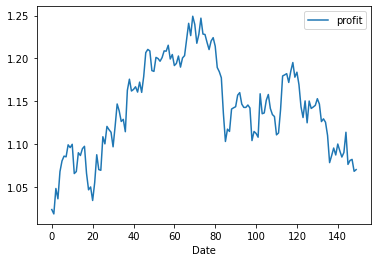

In [24]:
x= pdf.index
y1= pdf['p']
plt.plot(x, y1, label='profit')

plt.xlabel('Date')
#plt.ylabel('price')
#plt.xticks(rotation= 45)
#plt.title(rdf.columns[0])
plt.legend(loc='best')
plt.show()

In [25]:
return_m = []
return_m.extend(profit)
for i in range(len(return_m)):
    return_m[i] = return_m[i] - 1
# print(return_m) #報酬率

In [26]:
pdf= pd.DataFrame(return_m, columns=['p'])
pdf #報酬率

,p
0,0.024095
1,0.019009
2,0.048626
3,0.036604
4,0.068244
...,...
145,0.076674
146,0.081282
147,0.082493
148,0.068602


In [27]:
# pdf.to_csv('td=100_1.csv', index=False)

In [28]:
import os
os.chdir('/content/gdrive/MyDrive/Colab Notebooks/LSTM預測結果/報酬率')
print(os.getcwd())#获取当前工作路径

outstr= 'td=450_151'+ '.csv'
pdf.to_csv(outstr) #相对位置，保存在getwcd()获得的路径下
outstr

/content/gdrive/MyDrive/Colab Notebooks/LSTM預測結果/報酬率


'td=450_151.csv'

In [29]:
pdf_return = pd.DataFrame(return_m, columns=['p'])
pdf_return
np.var(pdf_return)

p    0.002802
dtype: float64

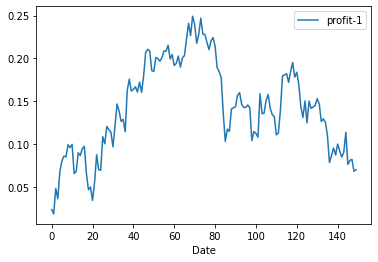

In [30]:
x= pdf_return.index
y1= pdf['p']
plt.plot(x, y1, label='profit-1')

plt.xlabel('Date')
#plt.ylabel('price')
#plt.xticks(rotation= 45)
#plt.title(rdf.columns[0])
plt.legend(loc='best')
plt.show()

In [31]:
pdf1= pdf

for i in range(inv_days-1):
  n= i+1
  pdf1.iloc[i,0]=  pdf1.iloc[i-1,0]* pdf.iloc[i,0]

pdf1

,p
0,1.701058e-03
1,3.233478e-05
2,1.572311e-06
3,5.755353e-08
4,3.927687e-09
...,...
145,2.902302e-130
146,2.359057e-131
147,1.946068e-132
148,1.335033e-133


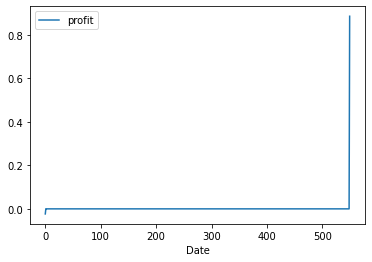

In [ ]:
x= pdf1.index
y1= pdf1['p']
plt.plot(x, y1, label='profit')

plt.xlabel('Date')
#plt.ylabel('price')
#plt.xticks(rotation= 45)
#plt.title(rdf.columns[0])
plt.legend(loc='best')
plt.show()